# 1. Carga de Datos

In [12]:
import pandas as pd
df = pd.read_csv('C:/Users/abelc/PycharmProjects/Ciencia De Datos/BD/ventas-por-factura.csv')

# 2. Eliminación de Columnas Irrelevantes

In [13]:
# Eliminar las columnas irrelevantes
df = df.drop(columns=["No de factura", "Fecha de factura", "ID Cliente"])

# Verificar que las columnas han sido eliminadas
print(df.head())


             Pais  Cantidad   Monto
0  United Kingdom       123  229,33
1  United Kingdom       163  209,73
2         Germany        -1   -1,45
3  United Kingdom         1   39,95
4  United Kingdom       357  344,83


# 3. Transformación de Tipos de Datos

In [14]:
# Convertir "País" a tipo categórico
df["Pais"] = df["Pais"].astype("category")

# Reemplazar comas en "Monto" y convertir a float
df["Monto"] = df["Monto"].astype(str).str.replace(",", ".").astype(float)

# Convertir "Cantidad" a entero
df["Cantidad"] = df["Cantidad"].astype(int)

# Verificar tipos de datos
print(df.dtypes)


Pais        category
Cantidad       int64
Monto        float64
dtype: object


# 4. Manejo de Valores Faltantes

In [15]:
# Verificar valores nulos en el DataFrame
print(df.isnull().sum())


Pais        0
Cantidad    0
Monto       0
dtype: int64


No es necesario hacer algo mas ya que no hay valores faltantes

# 5. Eliminación de Duplicados

In [16]:
# Verificar si hay registros duplicados
duplicados = df.duplicated().sum()
print(f"Número de registros duplicados: {duplicados}")

# Si hay duplicados, eliminarlos
if duplicados > 0:
    df = df.drop_duplicates()
    print("Registros duplicados eliminados.")

# Verificar nuevamente
print(f"Registros después de la limpieza: {df.shape[0]}")


Número de registros duplicados: 4243
Registros duplicados eliminados.
Registros después de la limpieza: 21710


# 6. Análisis de la Variable Categórica

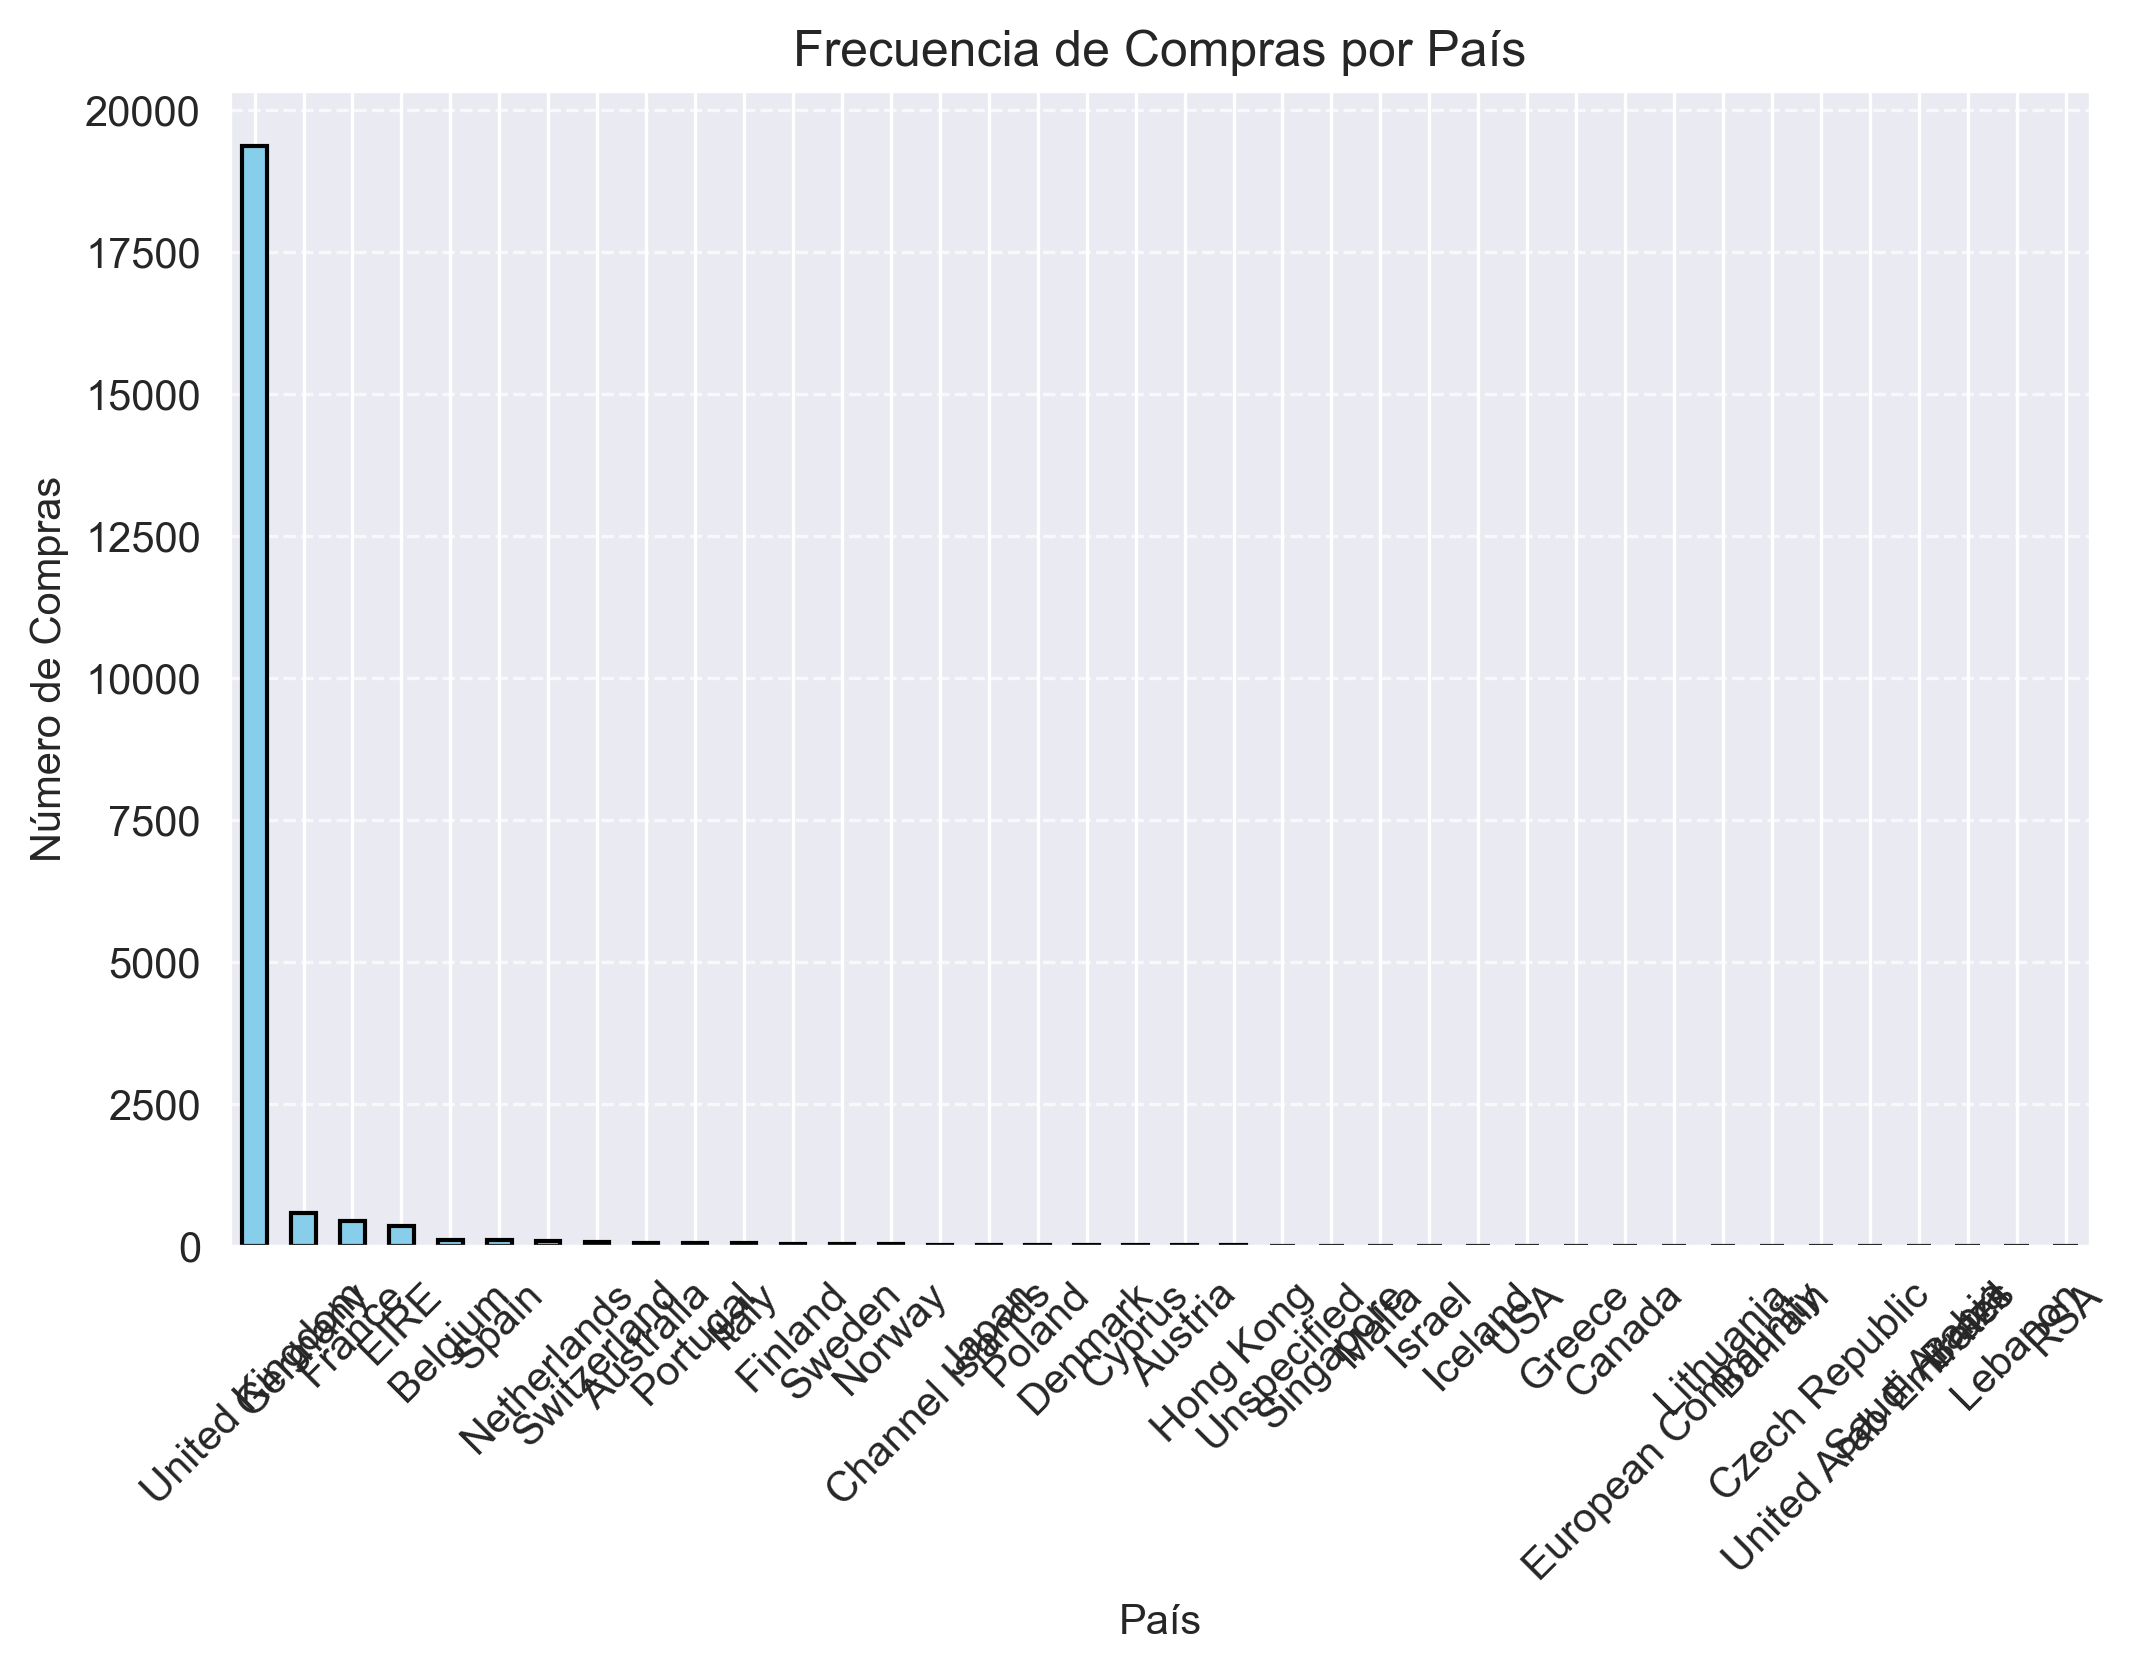

In [17]:
import matplotlib.pyplot as plt

# Contar la frecuencia de cada país
frecuencias_paises = df["Pais"].value_counts()

# Graficar el histograma de barras
plt.figure(figsize=(8, 5))
frecuencias_paises.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("País")
plt.ylabel("Número de Compras")
plt.title("Frecuencia de Compras por País")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


Estados unidos tiene ventas por encima de los demas paises

# 7. Análisis de las Variables Numéricas

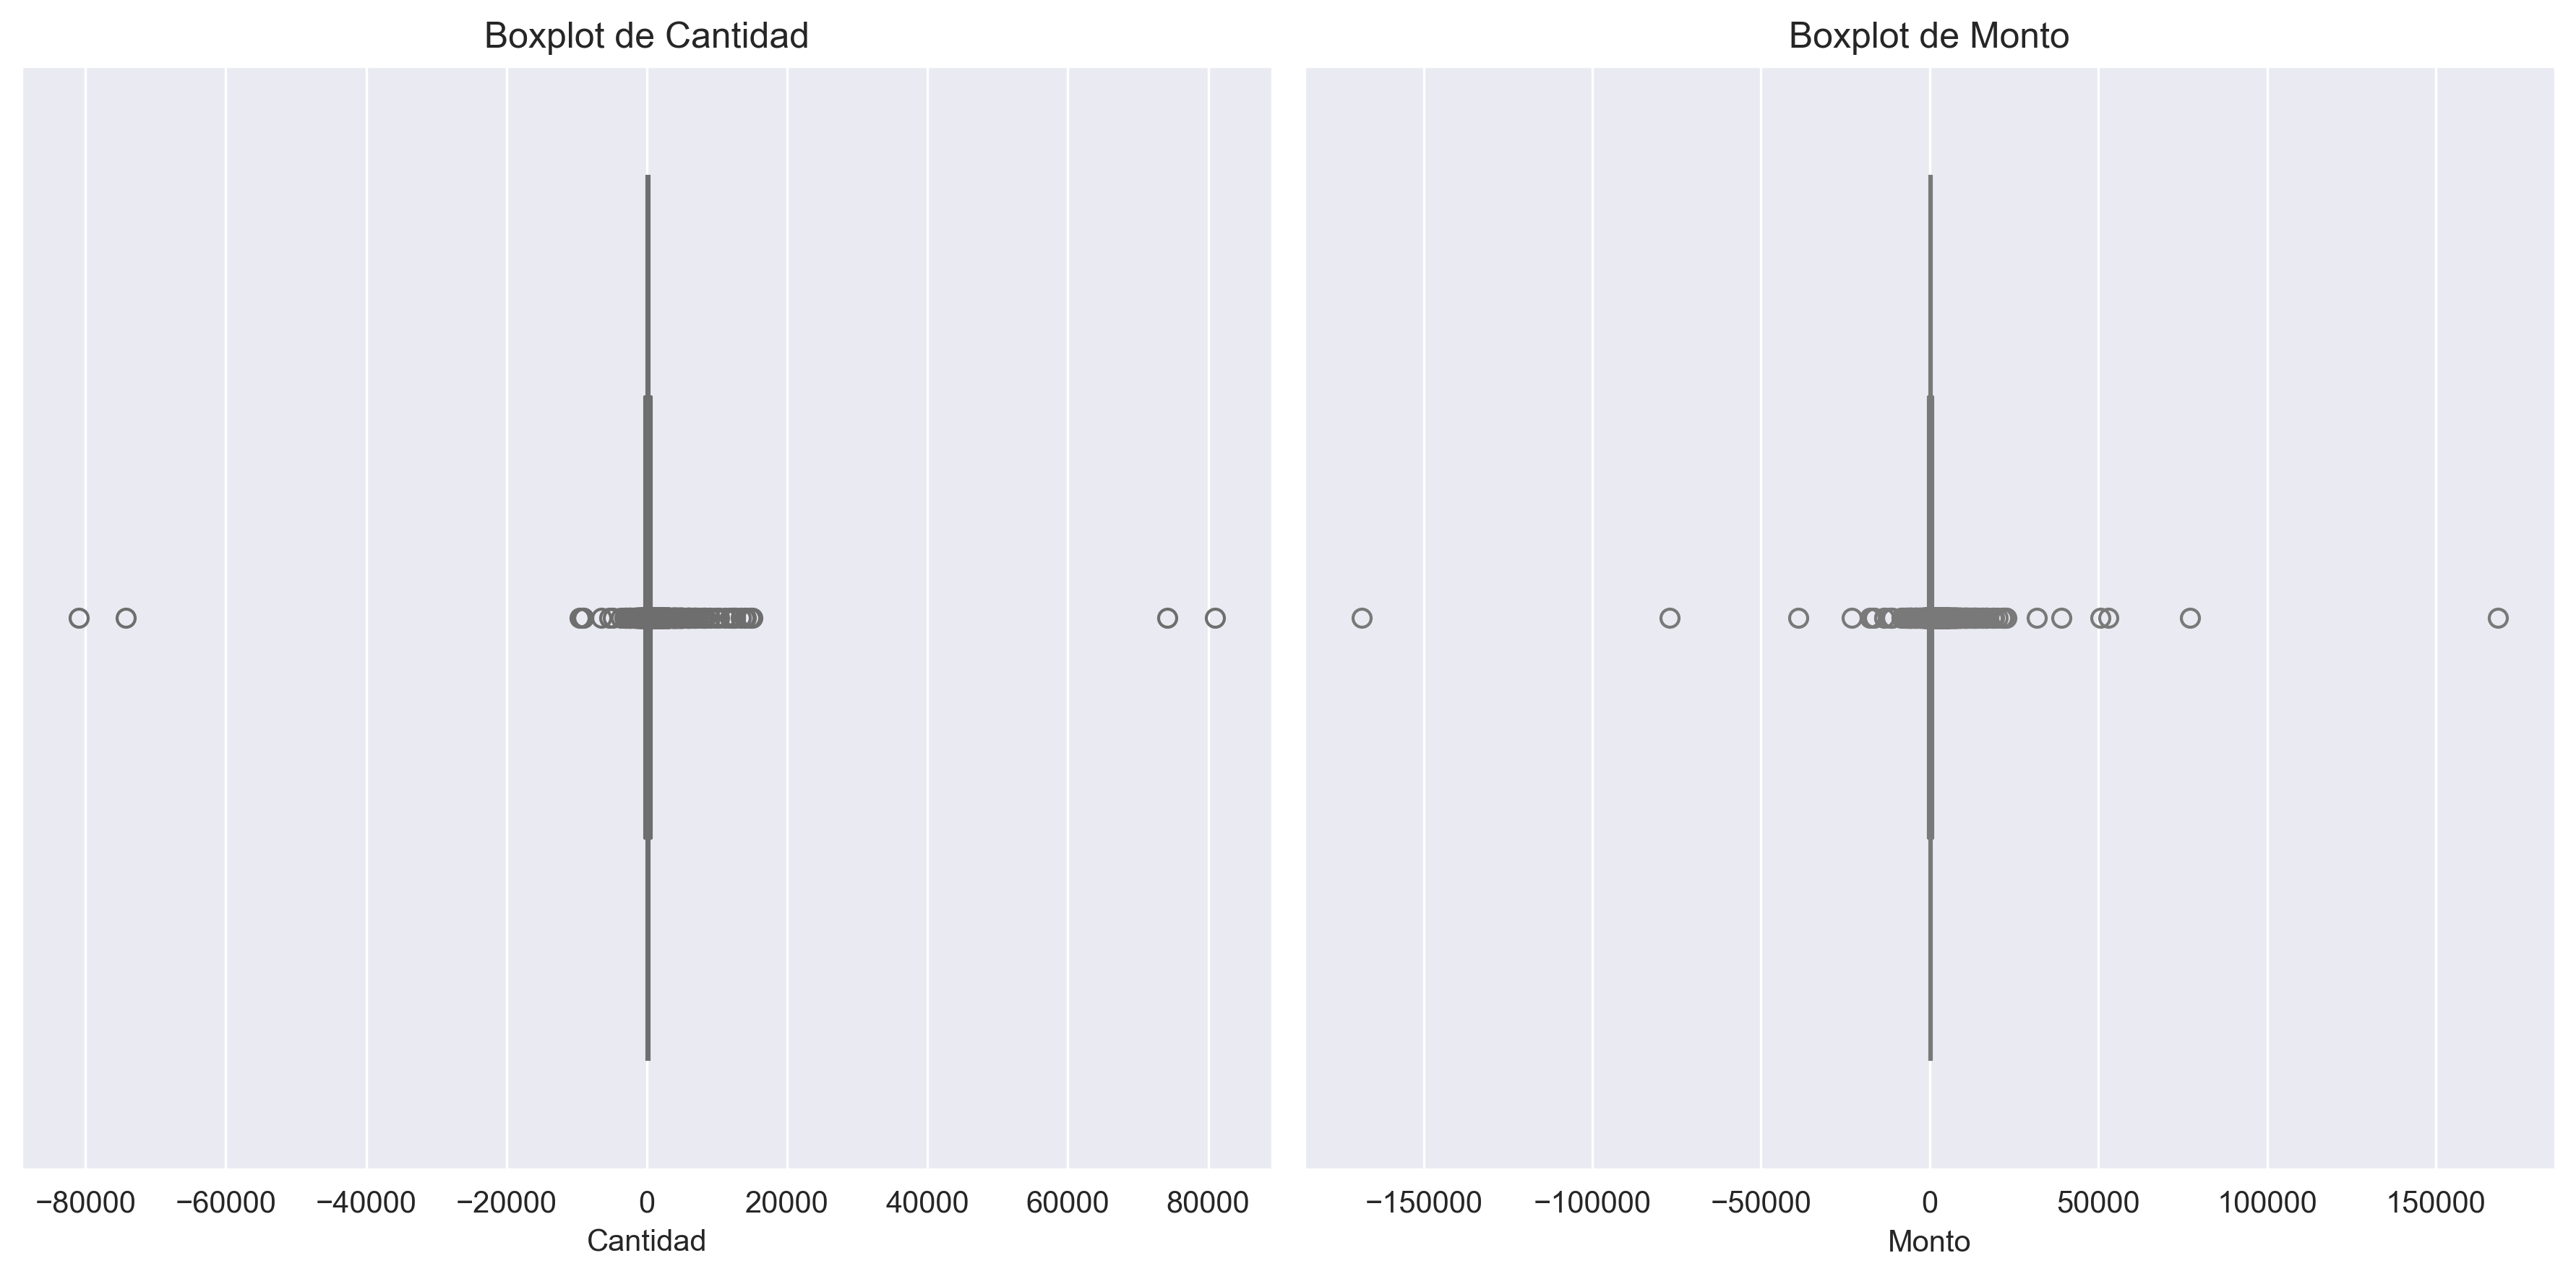

In [18]:
import seaborn as sns

# Crear un gráfico de caja para "Cantidad" y "Monto"
plt.figure(figsize=(12, 6))

# Subgráfico para "Cantidad"
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x="Cantidad", color="lightcoral")
plt.title("Boxplot de Cantidad")

# Subgráfico para "Monto"
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="Monto", color="lightblue")
plt.title("Boxplot de Monto")

plt.tight_layout()
plt.show()


Hay valores outliers en ambas columnas

# 8. Manejo de Valores Atípicos



In [19]:
# Función para realizar la winsorización
def winsorize_series(series, percentil=95):
    # Calculando el percentil 95
    limite_superior = series.quantile(percentil / 100)

    # Winsorización: ajustamos los valores mayores al percentil 95
    return series.clip(upper=limite_superior)

# Detectar valores atípicos en "Cantidad"
cantidad_q1 = df["Cantidad"].quantile(0.25)
cantidad_q3 = df["Cantidad"].quantile(0.75)
cantidad_iqr = cantidad_q3 - cantidad_q1
cantidad_outliers = ((df["Cantidad"] < (cantidad_q1 - 1.5 * cantidad_iqr)) |
                     (df["Cantidad"] > (cantidad_q3 + 1.5 * cantidad_iqr))).sum()
print(f"Valores atípicos en 'Cantidad': {cantidad_outliers}")

# Detectar valores atípicos en "Monto"
monto_q1 = df["Monto"].quantile(0.25)
monto_q3 = df["Monto"].quantile(0.75)
monto_iqr = monto_q3 - monto_q1
monto_outliers = ((df["Monto"] < (monto_q1 - 1.5 * monto_iqr)) |
                  (df["Monto"] > (monto_q3 + 1.5 * monto_iqr))).sum()
print(f"Valores atípicos en 'Monto': {monto_outliers}")

# Winsorización al percentil 95
df["Cantidad"] = winsorize_series(df["Cantidad"], percentil=95)
df["Monto"] = winsorize_series(df["Monto"], percentil=95)

# Verificar los cambios
print(f"Después de winsorización:\nCantidad - Min: {df['Cantidad'].min()}, Max: {df['Cantidad'].max()}")
print(f"Monto - Min: {df['Monto'].min()}, Max: {df['Monto'].max()}")


Valores atípicos en 'Cantidad': 1721
Valores atípicos en 'Monto': 2058
Después de winsorización:
Cantidad - Min: -80995.0, Max: 767.5499999999993
Monto - Min: -168469.6, Max: 1491.2529999999997


# 9. Filtrado de Compras (Eliminar Devoluciones)

In [20]:
# Filtrar los datos para eliminar devoluciones (Cantidad <= 0 o Monto <= 0)
df_filtrado = df[(df["Cantidad"] > 0) & (df["Monto"] > 0)]

# Verificar el número de registros después del filtrado
print(f"Registros después de filtrar: {df_filtrado.shape[0]}")

Registros después de filtrar: 18916


# 10. Codificación de Variables Categóricas

In [21]:
# Realizar la codificación One-Hot para la variable "Pais"
df_codificado = pd.get_dummies(df_filtrado, columns=["Pais"], drop_first=False)

# Verificar los primeros registros del DataFrame codificado
print(df_codificado.head())


   Cantidad   Monto  Pais_Australia  Pais_Austria  Pais_Bahrain  Pais_Belgium  \
0     123.0  229.33           False         False         False         False   
1     163.0  209.73           False         False         False         False   
3       1.0   39.95           False         False         False         False   
4     357.0  344.83           False         False         False         False   
5      91.0  199.98           False         False         False         False   

   Pais_Brazil  Pais_Canada  Pais_Channel Islands  Pais_Cyprus  ...  Pais_RSA  \
0        False        False                 False        False  ...     False   
1        False        False                 False        False  ...     False   
3        False        False                 False        False  ...     False   
4        False        False                 False        False  ...     False   
5        False        False                 False        False  ...     False   

   Pais_Saudi Arabia  Pais

# 11. Normalización de Variables

In [22]:
from sklearn.preprocessing import MinMaxScaler

# Crear el objeto MinMaxScaler
scaler = MinMaxScaler()

# Normalizar las variables "Cantidad" y "Monto"
df_codificado[["Cantidad", "Monto"]] = scaler.fit_transform(df_codificado[["Cantidad", "Monto"]])

# Verificar las primeras filas del DataFrame normalizado
print(df_codificado.head())


   Cantidad     Monto  Pais_Australia  Pais_Austria  Pais_Bahrain  \
0  0.159155  0.153568           False         False         False   
1  0.211337  0.140421           False         False         False   
3  0.000000  0.026541           False         False         False   
4  0.464418  0.231039           False         False         False   
5  0.117409  0.133881           False         False         False   

   Pais_Belgium  Pais_Brazil  Pais_Canada  Pais_Channel Islands  Pais_Cyprus  \
0         False        False        False                 False        False   
1         False        False        False                 False        False   
3         False        False        False                 False        False   
4         False        False        False                 False        False   
5         False        False        False                 False        False   

   ...  Pais_RSA  Pais_Saudi Arabia  Pais_Singapore  Pais_Spain  Pais_Sweden  \
0  ...     False        

# 12. Análisis de Correlaciones

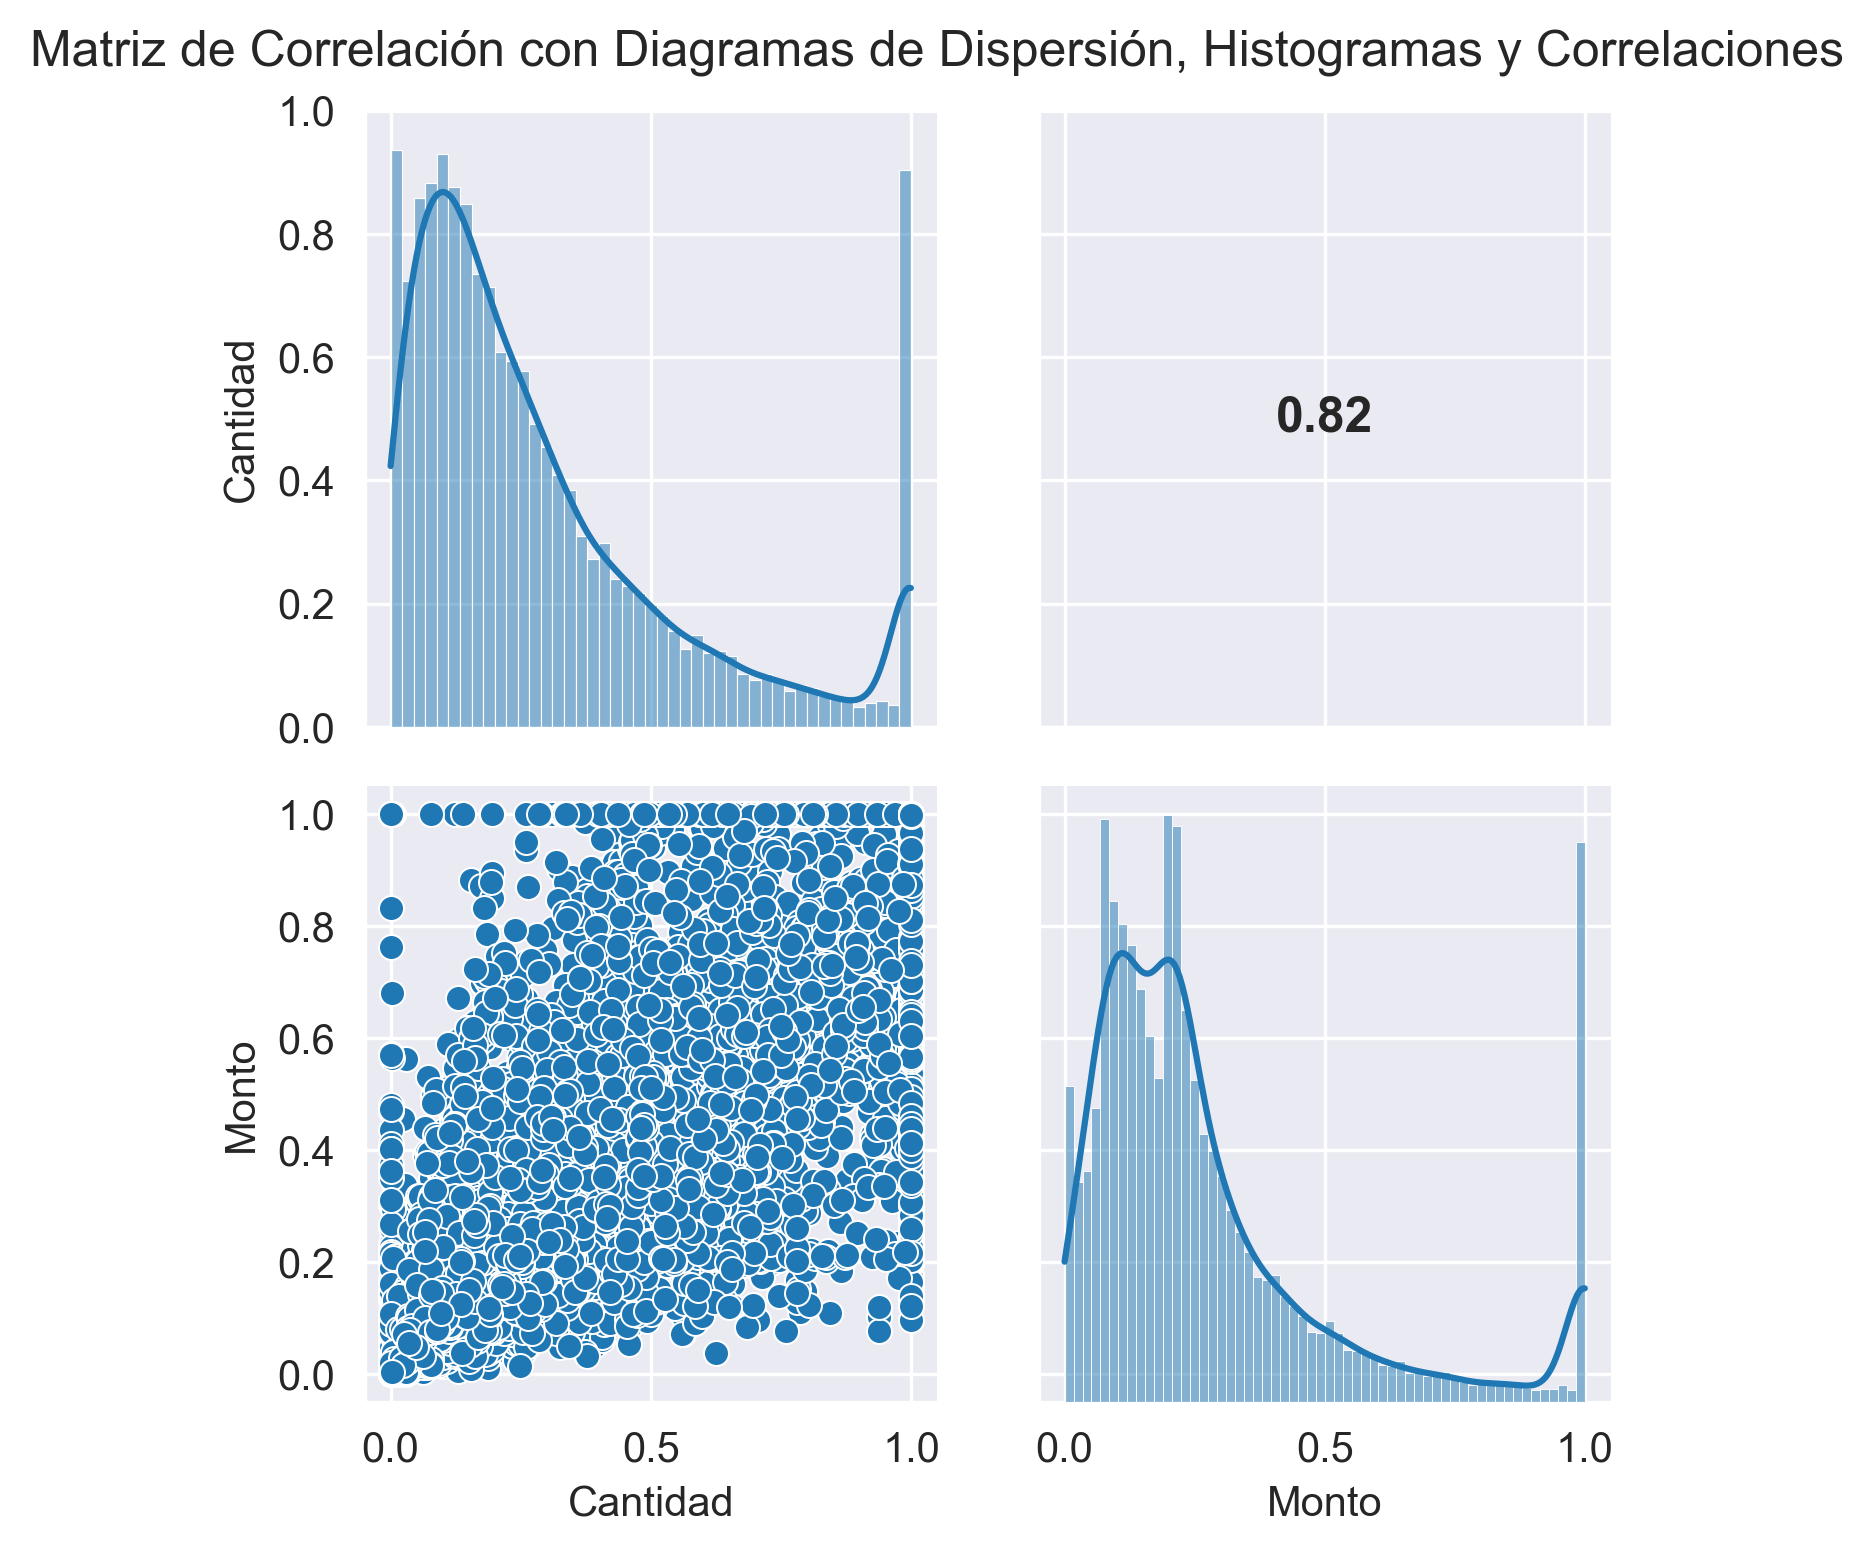

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Crear la función para agregar correlaciones en la parte superior
def correlation_upper(x, y, **kwargs):
    r = np.corrcoef(x, y)[0, 1]
    ax = plt.gca()
    ax.annotate(f'{r:.2f}', xy=(0.5, 0.5), xycoords=ax.transAxes,
                ha='center', va='center', fontsize=12, fontweight='bold')

# Configuración para la calidad de la imagen
plt.rcParams["figure.dpi"] = 300

# Crear la matriz de correlación visual con gráficos de dispersión, histogramas y correlaciones
g = sns.PairGrid(df_codificado, vars=['Cantidad', 'Monto'])

# Agregar gráficos de dispersión en la parte inferior
g.map_lower(sns.scatterplot, edgecolor="w")

# Agregar histogramas en la diagonal
g.map_diag(sns.histplot, kde=True)

# Agregar correlaciones en la parte superior
g.map_upper(correlation_upper)

# Mostrar el gráfico
plt.suptitle("Matriz de Correlación con Diagramas de Dispersión, Histogramas y Correlaciones", y=1.02)
plt.show()


Las variables si estan correlacionadas, en cuanto mas unidades vendidas mas aumental el monto total de estas ventas